# Mixed Effects Regression Models for Continuous Outcomes

Mixed Effects Regression Models (MRMs) becuase of the limitation of traditional models like ANOVA and MANOVA 

Limitations of ANOVA:

    Compound symetry assumption and must have complete data 
    
Limitations of MANOVA:

    Compound symetry assumption, must have complete data and describes group trends over
    time, not individual's effect of trend.
    
### Mixed Effects Regression Models (MRMs)

MRMs include random-effects in a regression model to account for an indivisual's influence on ther reppeated observation, dicribing each subjects trend accross time. They also indicate the degree of subject variation that exists in the population of subjects.

Useful Because:

    1) Subject not assumed to be measured all at the same time, easier to handle 
    missing data
        - increases the statistical power and reduced missing data bias
    2) ANOVA and MANOVA estimates the average change across time, MRMs estimates the
    average change and individual change across time
    
This notebook will expand on a Simple Linear Regression model to include random effects

### Simple Linear Regression Model

$$y_{ij} = \beta_0 + \beta_1 t_{ij} + \epsilon_{ij}$$
where 

$i = 1, 2, ..., N$ Subjects

for

$j = 1, 2, ..., n_i$ Occasions

Note:

$y_{ij}, t_{ij}, \epsilon_{ij}$ all have the subscripts $ij$. Therefore $y, t, \epsilon$ are allowed be different for each individual and ocassion.

### Adding Random Intecept $v$

To allow for the influence of each individual on their repeated measure we can add the $v_{0i}$ term to represent the influence of an individual $i$ on their repeated observation:

$$y_{ij} = v_{0i} + \beta_0 + \beta_1 t_{ij} + \epsilon_{ij}$$

for organization purposes:

$$y_{ij} = \beta_0 + \beta_1 t_{ij} + v_{0i} + \epsilon_{ij}$$

We can represent the model as a hierarchical or multilevel model:

#### Level 1 (within-subject effect):
$$y_{ij} = b_{0i} + b_{1i} t_{ij} + \epsilon_{ij}$$

Representing that an individual $i$'s response, at time $j$, is influenced by the individual's initial level $b_{0i}$ and time trend $b_{1i}$


#### Level 2 (between-subject effect):


$$b_{0i} = \beta_0 + v_{0i}$$
$$b_{1i} = \beta_1$$

Representing an individual $i$'s initial level is determined by the population's initial level $\beta_0$ and his/her individuals diviations from the population, represented by $v_{0i}$. This model also states that each individual has the same slope, that is parallel to the population's slope, expressed by $b_{1i} = \beta_1$.



Note on incomplete data:

The underlying assumption of the model is that the data that are available for a given individual are representative of how that individual deviates from the population trend across the timeframe of the study. MRMs for longitudinal data using the maximum likelihood estimation provide valid statistical tests in the presence of ignorable nonresponse.

Note on Compound Symmetry and lntraclass Correlation:

Compund symetry is implied by the random intercept. If the covariance is expressed as a correlation, the intraclass correlation is derived. Individual variance over total variance

$$ICC = \frac{\sigma_{v}^2}{\sigma^2 + \sigma_{v}^{2}}$$ 

Hypothesis testing for fixed effects parameters ($\beta$'s) calls for Wald's test or Z-tests or chi-squared tests on one degree of freedom. However, for the Variance Covariance terms, Wald's test is nit statistically sound.

Liklihood ratio tests can be used on nested models for uni or multi parameter hypothesis tests.


## Psychiatric dataset 

Dataset from psychiatric study Reisby et al. [1977]:

(https://link.springer.com/article/10.1007/BF00426574)

Longitudinal study on the relatioship between plasma levels of imipramine (IMI) and desipramine (DMI) in 66 depressed patients.

Imipramine was commonly prescribed to treat major depression. Imipramine biotransforms into desmethylimipramine, or desipramine, so measurments of desipramine were also taken.

Major depression classified as :

    1) nonendogenous depression -  associated with some tragic life event (29 Patients)
    
    2) endogenous depression -  appears to occur spontaneously (37 Patients)
    
After 1 week of placebo, patients recieve 225 mg/day doses imipramine for 4 weeks

Subjects rated on the Hamilton Depression Rating Scale (HDRS)

1st rating - begining of placebo week

2nd rating - end of placebo week

3rd rating - end of 2nd week (with imipramine)

4th ..

..

..

HRDS scores are used as the dependant variable where the higher HDRS Score - more depressed, Lower HDRS Score - less depressed.

IMI and DMI measurements were made at the end of each week.
IMI and DMI will be treated as time varing covariates. 

Not all patients were measured at every timepoint. Summary statistics are posted below.

From terminal running : 
    
    python DAT_to_csv.py '../Datasets/RIESBY.DAT.txt' '../Datasets/RIESBY.csv'

In [1]:
import pandas as pd

dataset = pd.read_csv('Datasets/RIESBY.csv', header=None, na_values='.', names=['PID', 'HDRS', 'Ones', 'Time', 'endogenous', 'NA', 'dummy'])
dataset = dataset.iloc[0:-1, 0:-1]
print('Number of Patients in dataset: ' + str(len(dataset.iloc[:, 0].unique())))

Number of Patients in dataset: 66


In [2]:
week_HDRS = dataset
'''
for week in range(0, 6):
    print('Week '+str(week))
    print('mean: '+ str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].mean()))
    print('sd: '+ str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].var()**(.5)))
    print('n: '+str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].count(None)))
    print('\n')
    '''


"\nfor week in range(0, 6):\n    print('Week '+str(week))\n    print('mean: '+ str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].mean()))\n    print('sd: '+ str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].var()**(.5)))\n    print('n: '+str(week_HDRS[week_HDRS['Time'] == float(week)].loc[:, 'HDRS'].count(None)))\n    print('\n')\n    "

The means as the study progresses tends to go down, the standard deviations go up (hinting the existence of heterogineity) and the subjects $n$ are not stable. For these reasons MANOVA would not be a good approach.

In [3]:
week0_HDRS = week_HDRS[week_HDRS['Time'] == 0.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week0'}).reset_index(drop=True)
week1_HDRS = week_HDRS[week_HDRS['Time'] == 1.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week1'}).reset_index(drop=True)
week2_HDRS = week_HDRS[week_HDRS['Time'] == 2.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week2'}).reset_index(drop=True)
week3_HDRS = week_HDRS[week_HDRS['Time'] == 3.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week3'}).reset_index(drop=True)
week4_HDRS = week_HDRS[week_HDRS['Time'] == 4.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week4'}).reset_index(drop=True)
week5_HDRS = week_HDRS[week_HDRS['Time'] == 5.0].loc[:, ['HDRS']].rename(columns={'HDRS':'Week5'}).reset_index(drop=True)

week_by_HDRS = pd.concat([week0_HDRS, week1_HDRS, week2_HDRS, week3_HDRS, week4_HDRS, week5_HDRS], axis=1)
print(week_by_HDRS.mean())
print(week_by_HDRS.count())
print(week_by_HDRS.var()**(.5))




Week0    23.442623
Week1    21.841270
Week2    18.307692
Week3    16.415385
Week4    13.619048
Week5    11.948276
dtype: float64
Week0    61
Week1    63
Week2    65
Week3    65
Week4    63
Week5    58
dtype: int64
Week0    4.533301
Week1    4.697997
Week2    5.485558
Week3    6.415051
Week4    6.970973
Week5    7.219424
dtype: float64


Listwise correlation - No missing data is used when calculating the correlations:

In [4]:
week_by_HDRS.dropna().corr()

,Week0,Week1,Week2,Week3,Week4,Week5
Week0,1.000000,0.493934,0.417635,0.444459,0.303388,0.221059
Week1,0.493934,1.000000,0.492479,0.513223,0.347402,0.227266
Week2,0.417635,0.492479,1.000000,0.730991,0.680273,0.527238
Week3,0.444459,0.513223,0.730991,1.000000,0.779563,0.622683
Week4,0.303388,0.347402,0.680273,0.779563,1.000000,0.723015
Week5,0.221059,0.227266,0.527238,0.622683,0.723015,1.000000


Pairwise correlation - Including the missing values:

In [5]:
week_by_HDRS.corr()

,Week0,Week1,Week2,Week3,Week4,Week5
Week0,1.000000,0.492987,0.410073,0.333101,0.226771,0.183821
Week1,0.492987,1.000000,0.494332,0.412289,0.308245,0.217919
Week2,0.410073,0.494332,1.000000,0.737767,0.668542,0.460759
Week3,0.333101,0.412289,0.737767,1.000000,0.817011,0.568088
Week4,0.226771,0.308245,0.668542,0.817011,1.000000,0.654350
Week5,0.183821,0.217919,0.460759,0.568088,0.654350,1.000000


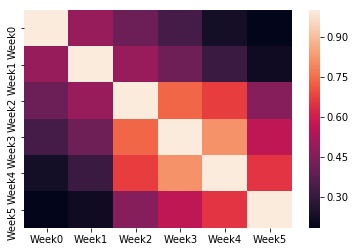

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

sns.heatmap(week_by_HDRS.corr())

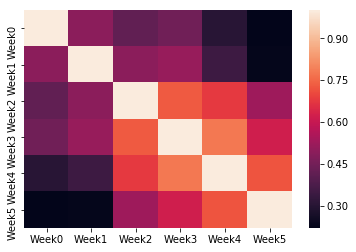

In [7]:
sns.heatmap(week_by_HDRS.dropna().corr())

Both show that the correlation weakens the further away the week is to a given week's correlation. By this observation, the compound symmetry assumption is clearly not valid. Plotting all HRDS's by their corresponding week proves out suspicions of heterogeneity:

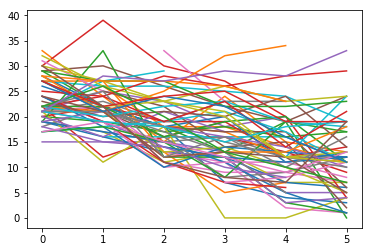

In [8]:
start_idx = 0
while int(len(week_HDRS)) != start_idx:
    plt.plot([0, 1, 2, 3, 4, 5], week_HDRS.loc[start_idx:(start_idx+5), ['HDRS']])
    start_idx += 6
plt.show()

Basic OLS Regression indicates that Patients are getting better on average relative to time.

In [9]:
import statsmodels.formula.api as smf
import numpy as np

results = smf.ols('HDRS ~ Time', data=week_HDRS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HDRS   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     173.2
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           9.40e-33
Time:                        16:10:52   Log-Likelihood:                -1199.9
No. Observations:                 375   AIC:                             2404.
Df Residuals:                     373   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6026      0.548     43.101      0.000      22.526      24.679
Time          -2.4054      0.183    -13.160      0.000      -2.765      -2.046
==============================================================================
Omnibus:                       14.932   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.678
Skew:                           0.461   Prob(JB):                     0.000394
Kurtosis:                       3.392   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
results.params

Intercept    23.602627
Time         -2.405361
dtype: float64

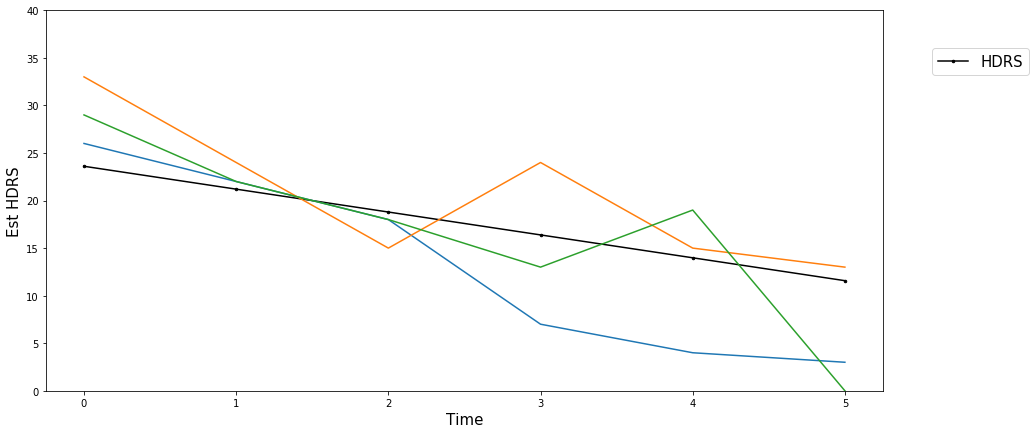

In [11]:
fig, axes = plt.subplots(figsize=(15, 7))
overall_time_est = np.add(np.dot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], \
                                 results.params.Time), results.params. Intercept)  
axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], overall_time_est,  '.-', \
          markersize=5, label='HDRS', color='black')
plt.plot([0, 1, 2, 3, 4, 5], week_HDRS.loc[0:5, ['HDRS']])
plt.plot([0, 1, 2, 3, 4, 5], week_HDRS.loc[6:11, ['HDRS']])
plt.plot([0, 1, 2, 3, 4, 5], week_HDRS.loc[12:17, ['HDRS']])
axes.set_ylim([0, 40])
axes.set_xlabel('Time', fontsize=15)
axes.set_ylabel('Est HDRS', fontsize=15)
axes.legend(fontsize=15, bbox_to_anchor=(1.05, 0.81), loc=3)


### Random Intercept and Trend

Adding the random intercept to the model is not enough, generally to simplistic. People generally dont have the same rate of change over time and the compound symmetry assumtion is not.a good one. To aliviate this we can add an error term to the rate of change. 
The model becomes:
Level 1 Remains the same:

$$y_{ij} = b_{0i} + b_{1i} t_{ij} + \epsilon_{ij}$$

Augmented Level 2:

$$b_{0i} = \beta_0 + v_{0i}$$
$$b_{1i} = \beta_1 + v_{1i}$$

Where 

$\beta_0$ is the overall population intercept

$\beta_1$ is the overall population slope

$v_{0i}$ is the intercept deviation for subject $i$

$v_{1i}$ is the slope deviation for subject $i$

Conditional independence is assumed under $v_{0i}$ and $v_{1i}$


The population distribution of intercept and slope deviations is assumed to
be bivariate normal $N(0,\sigma_v)$ where 

random-effects variance-covariance matrix:

\begin{equation}
\Sigma_v=
\begin{bmatrix}
\sigma^2_{v_0} & \sigma_{v_0v_1}\\
\sigma_{v_0v_1} & \sigma^2_{v_1}
\end{bmatrix}
\end{equation}


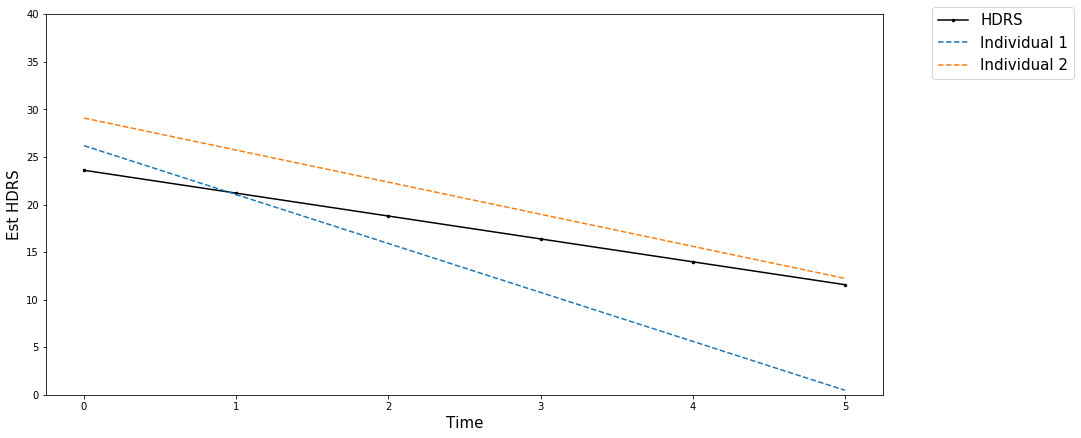

In [12]:
indiv_1 = smf.ols('HDRS ~ Time', data=week_HDRS.loc[0:5, :]).fit()
indiv_2 = smf.ols('HDRS ~ Time', data=week_HDRS.loc[6:11, :]).fit()
indiv_1_est = np.add(np.dot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], \
                                 indiv_1.params.Time), indiv_1.params.Intercept) 
indiv_2_est = np.add(np.dot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], \
                                 indiv_2.params.Time), indiv_2.params.Intercept) 


fig, axes = plt.subplots(figsize=(15, 7))

axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], overall_time_est,  '.-', \
          markersize=5, label='HDRS', color='black')

axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], indiv_1_est,  '--', \
          markersize=5, label='Individual 1')
axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], indiv_2_est,  '--', \
          markersize=5, label='Individual 2')

axes.set_ylim([0, 40])
axes.set_xlabel('Time', fontsize=15)
axes.set_ylabel('Est HDRS', fontsize=15)
axes.legend(fontsize=15, bbox_to_anchor=(1.05, 0.81), loc=3)

In [13]:
indiv_list = []
indiv_list_est = []

start_idx = 0
while int(len(week_HDRS)) != start_idx:
    indiv = None
    indiv = smf.ols('HDRS ~ Time', data=week_HDRS.loc[start_idx:(start_idx+5), :]).fit()
    indiv_list.append(indiv)
    indiv_list_est.append(np.add(np.dot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], \
                                 indiv.params.Time), indiv.params.Intercept))
    
    start_idx += 6

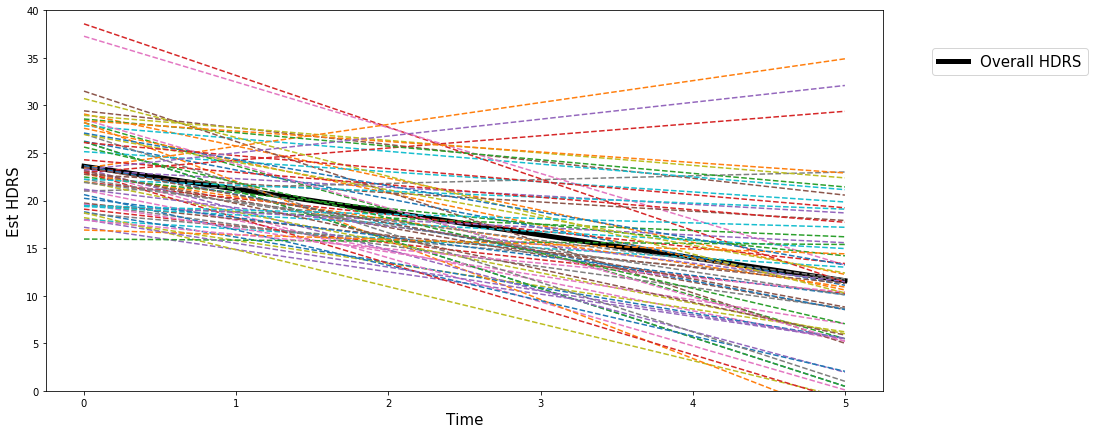

In [14]:

fig, axes = plt.subplots(figsize=(15, 7))

axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], overall_time_est,  '.-', \
          markersize=5, label='Overall HDRS', color='black', linewidth= 5)

for indiv in indiv_list_est:
    axes.plot([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], indiv,  '--', \
          markersize=5 )
    

axes.set_ylim([0, 40])
axes.set_xlabel('Time', fontsize=15)
axes.set_ylabel('Est HDRS', fontsize=15)
axes.legend(fontsize=15, bbox_to_anchor=(1.05, 0.81), loc=3)


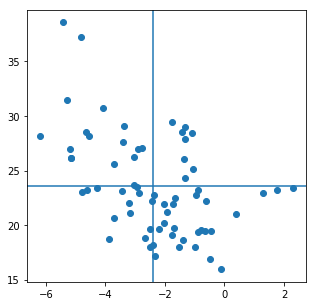

In [15]:
intercepts = []
slopes = []

fig, axes = plt.subplots(figsize=(5, 5))
for i in indiv_list:
    
    intercepts.append(i.params.Intercept)
    slopes.append(i.params.Time)
      
axes.scatter(slopes, intercepts)

axes.axhline(results.params.Intercept)
axes.axvline(results.params.Time)

### Effects of Diagnosis on Time Trends

Is it possible to explain some fo the heteroginiety in intercepts and slopes. Separating Endogenough and nonendogenous patients.

In [16]:
endo_df = week_HDRS[week_HDRS['endogenous'] == 1.0]
nonendo_df = week_HDRS[week_HDRS['endogenous'] == 0.0]

print('Endogenous Participants')
print(pd.pivot_table(endo_df, values='HDRS', columns='Time', index='PID').mean())
print(pd.pivot_table(endo_df, values='HDRS', columns='Time', index='PID').count())
print('Nonendogenous Participants')
print(pd.pivot_table(nonendo_df, values='HDRS', columns='Time', index='PID').mean())
print(pd.pivot_table(nonendo_df, values='HDRS', columns='Time', index='PID').count())


Endogenous Participants
Time
0.0    24.000000
1.0    23.000000
2.0    19.297297
3.0    17.277778
4.0    14.470588
5.0    12.580645
dtype: float64
Time
0.0    33
1.0    34
2.0    37
3.0    36
4.0    34
5.0    31
dtype: int64
Nonendogenous Participants
Time
0.0    22.785714
1.0    20.482759
2.0    17.000000
3.0    15.344828
4.0    12.620690
5.0    11.222222
dtype: float64
Time
0.0    28
1.0    29
2.0    28
3.0    29
4.0    29
5.0    27
dtype: int64


To include endogineity into the model, the variable $DX$ can be included into the level 2 part because this is not dependent on time. Clearly the Engodenous group has higher HDRS than the Nonengodenous group throughout, so :

$$b_{0i} = \beta_0 + \beta_2 DX_i + v_{0i}$$

$$b_{1i} = \beta_1 + \beta_3 DX_i + v_{1i}$$

so now

$\beta_0$ average HDRS at week 0 for NE
$\beta_1$ avg weekly improvements for NE
$\beta_2$ avg HDRS at week 0 for E
$\beta_3$ avg weekly improvements for E relative to NE patients OR Diagnosis by Time interaction.
$v_{0i}$ 

# Matrix Formulation!!!

As shown in : https://github.com/arturoto/Longitudinal-Data-Analysis-in-Python/blob/master/Quick%20Multilevel%20Mixed%20Models.ipynb

$$\underset{n_i x 1}{y_i} = \underset{n_i x p}{X_i} *\underset{p x 1}{\beta} + \underset{n_i x r}{Z_i} * \underset{r x 1}{v_i} + \underset{n_i x 1}{\epsilon_i}$$

where:

$i = 1, ... N$ individuals

$j = 1, ..., n_i$ observations for individual $i$

$y_i$ is the $n_i x 1$ dependent variable for individual $i$

$X_i$ is the $n_i x p$ covariate matris for individual $i$

$\beta$ fixed regression parameter

$Z_i$ design matrix for the random effects

$v_i$ random individual effects

$\epsilon_i$ error vector



\begin{equation}
y_i=
\begin{bmatrix}
y_{i1} \\
y_{i2} \\
.. \\
.. \\
y_{in_i}
\end{bmatrix}
\end{equation}

and 

\begin{equation}
X_i = Z_i = 
\begin{bmatrix}
1 & t_{i1} \\
1 & t_{i2} \\
.. & .. \\
.. & .. \\
1 & t_{in_i}
\end{bmatrix}
\end{equation}


while for the data matricies:

\begin{equation}
\beta = 
\begin{bmatrix}
\beta_0\\
\beta_1 \\
\end{bmatrix}
\end{equation}

and 

\begin{equation}
v_0 = 
\begin{bmatrix}
v_{0i}\\
v_{1i}\\
\end{bmatrix}
\end{equation}

for the model including diagnosis and diagnosis by time interaction:


\begin{equation}
X_i = Z_i = 
\begin{bmatrix}
1 & t_{i1} & DX_i & DX_i * t_{i1} \\
1 & t_{i2} & DX_i & DX_i * t_{i2}\\
.. & .. & .. & .. \\
.. & .. & .. & .. \\
1 & t_{in_i} & DX_i & DX_i * t_{in_i}
\end{bmatrix}
\end{equation}

While it may seem that there are multiple models given the levels, its all one model.


Asumptions:

$$\epsilon \sim N(0, \sigma^2 I_{n_i})$$
$$v_i \sim N(0, \Sigma_v)$$



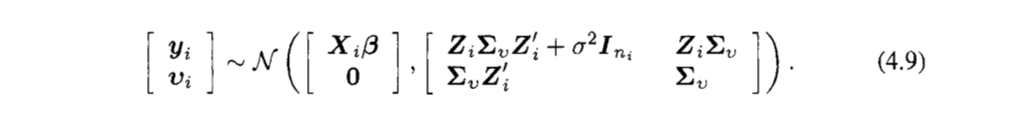


The mean Posterior Distribution of $v_i$ given $y_i$ yields the EB est:
$$\hat{v_i} = [Z_i'(\sigma^2 I_{n_i})^{-1} Z_i  + \Sigma_v^{-1}]^{-1} Z_i'(\sigma^2 I_{n_i})^{-1} (y_i - X_i\beta)$$

with the given posterior distribution covariacne matrix:

$$\Sigma_{v|y_i} = [Z_i'(\sigma^2 I_{n_i})^{-1} Z_i  + \Sigma_v^{-1}]^{-1}$$

The variance-covariance matrix of the repeated measures y is of the form :

$$V(y_i) = Z_i \Sigma_v Z_i'  + \sigma^2I_{n_i}$$


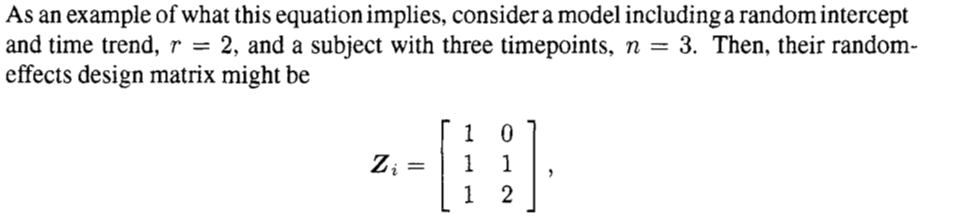


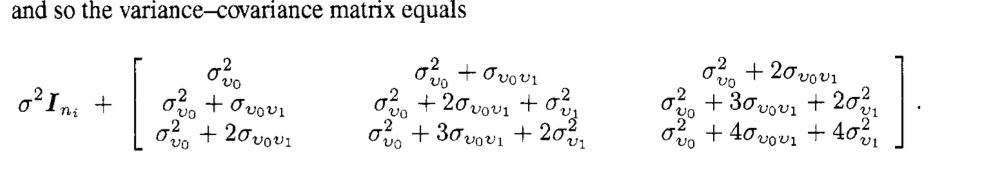




In [17]:
time_related = pd.pivot_table(week_HDRS, values='HDRS', columns='Time', index='PID')
time_related.cov()

Time,0.0,1.0,2.0,3.0,4.0,5.0
Time,,,,,,
0.0,20.550820,10.114943,10.138701,10.085593,7.190865,6.277576
1.0,10.114943,22.071173,12.276838,12.550238,10.263661,7.719865
2.0,10.138701,12.276838,30.091346,25.125992,24.625595,18.384398
3.0,10.085593,12.550238,25.125992,41.152885,37.338974,23.991541
4.0,7.190865,10.263661,24.625595,37.338974,48.594470,30.512795
5.0,6.277576,7.719865,18.384398,23.991541,30.512795,52.120085


In [18]:
Sig_h_S_v = pd.DataFrame({'1':[12.63, -1.42],
                  '2':[-1.42, 2.08],
                 })
np_Sig_h_S_v = Sig_h_S_v.values

since:

In [19]:
Z = pd.DataFrame({'Inter':[1, 1, 1, 1, 1, 1],
                  't':[0, 1,2, 3, 4, 5],
                 })
np_Z = Z.values

some how $\hat{\sigma}^2$ = 12.22 or 12.63

In [20]:
sig_h_2 = 12.22
var_cov_h = np.add(np.dot(np_Z, np.dot(np_Sig_h_S_v, np_Z.T)), \
                   np.dot(sig_h_2, np.identity(6)))

$$\hat{V}(y) =$$

In [21]:
var_cov_h

array([[24.85, 11.21,  9.79,  8.37,  6.95,  5.53],
       [11.21, 24.09, 12.53, 13.19, 13.85, 14.51],
       [ 9.79, 12.53, 27.49, 18.01, 20.75, 23.49],
       [ 8.37, 13.19, 18.01, 35.05, 27.65, 32.47],
       [ 6.95, 13.85, 20.75, 27.65, 46.77, 41.45],
       [ 5.53, 14.51, 23.49, 32.47, 41.45, 62.65]])

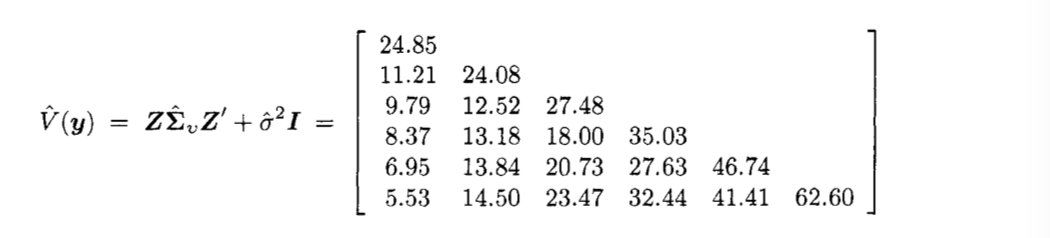

Different parts of the estimations must be done through different methods.

Random individual effects $v_i$ used the Empirical Bayes

$\sigma^2, \Sigma_v, \beta$ uses ML or REML (Residual Maximum Likelihood)

REML to remove ML's Bias downward in this case.



EB estimates for individual effects (EAP for Expected a Posterori)

$$\tilde{v_i} = \rho_{n_in_i} \frac{1}{n_i}1_i'(y_i - X_i \beta)$$
$$= \rho_{n_in_i}  \frac{1}{n_i} \sum_{j=1}^{n_i} (y_{ij} - x_{ij}'\beta)$$
$$\rho_{nn} = \frac{nr}{1 + (n-1)r}$$

where:
$x_{ij}$ is the vector of regressors for an individual $i$ at time $j$
$\rho_{n_in_i}$ is the Spearman-Brown reliability formula
$r$ is the intraclass correlation

EB estomate for posterior mean: the variance of the posterior distribution of v

$$\sigma_{v|y_i}^2 = \sigma_v^2(1 - \rho_{n_in_i})$$



Used in EM algorithm:

$$\hat{\beta} = [\sum_{i=1}^{N} X_i'X_i]^{-1} [\sum_{i=1}^{N} X_i'(y_i - 1_i\tilde{v_i})]$$

$$\hat{\sigma_v}^2 = \frac{1}{N}\sum_i^N \tilde{v_i}^2 + \tilde{v_{v|y_i}}^2$$

$$\hat{\sigma}^2 = \frac{1}{N}\sum_i^N    (y_i - X_i\hat{\beta} - 1_i\tilde{v_i})'
(y_i - X_i\hat{\beta} - 1_i\tilde{v_i})   + n_i\tilde{v_{v|y_i}}^2$$

iterate EB and ML equations until convergence

Note that 
$\tilde{v_{v|y_i}}$, $\tilde{v_i}$ and $\sigma_v^2$ approaches 0

and

$\beta$ and error variance $\sigma^2$ approach the maximum ML solution:


$$\hat{\beta} = [\sum_{i=1}^{N} X_i'X_i]^{-1} [\sum_{i=1}^{N} X_i'y_i]$$
and
$$\hat{\sigma} = \frac{1}{N} \sum_{i=1}{N}(y_i - X_i\hat{\beta})'(y_i - X_i\hat{\beta})$$

Note that $\hat{\sigma}_v^2$ can be wirrten as:
$$\hat{\sigma}_v^2 = \frac{1}{N}\sum_i^N \tilde{v_{i}}     +\frac{1}{N} \sum_i^N \tilde{v_{v|y_i}}$$


## Benefits of MRM

MRMs allow for:

precens of missing data

irregularly-spaced measurments across time

time-varing and invariant covariates

accomodation of individual-specific deviations from teh average time trend 

and estimation of the population variance associated with these individual effects.

Cross-sectional clusted data can also be considered as two-level data where the clustes would be represented by level 2 and clustered by level 1.




## ----------- Test a few things

In [69]:
mm_data = week_HDRS
p_matrix = []
p_fitted = []
p_param_fit = []

start_idx = 0
while int(len(mm_data)) != start_idx:
    
    p_matrix.append(mm_data.loc[start_idx:(start_idx+5), :])
    indiv = None
    indiv = smf.ols('HDRS ~ Time', data=week_HDRS.loc[start_idx:(start_idx+5), :]).fit()
    p_fitted.append(indiv)
    p_param_fit.append([indiv.params.Intercept, indiv.params.Time])

    
    start_idx += 6
    
means = pd.DataFrame(p_param_fit).mean()
pd.DataFrame(p_param_fit)[0].var()


20.97483678889166